# Тема проекта

## Исследование данных об автомобилях для анализа их характеристик.




# Описание проекта

**Проект по изучению данных автомобилей** направлен на анализ базы данных автомобилей, включающей характеристики, такие как бренд, модель, год выпуска, пробег, стоимость, мощность, крутящий момент и объем двигателя. Основное внимание уделяется изучению связей между этими параметрами и их влиянием на экономичность и производительность.

**Бизнес-задача:** Анализ характеристик автомобилей и поиск зависимостей между их параметрами и стоимостью.

# Цели проекта
1. Определить, как характеристики автомобилей влияют на их стоимость.
2. Проанализировать, как пробег автомобиля связан с его техническими характеристиками и состоянием.
---
# Задачи проекта
1. Проанализировать влияние года выпуска на эффективность и стоимость автомобилей.
2. Анализ различных аспектов автомобилей, включая мощность, год выпуска, цены и другие характеристики.  
3. Провести анализ и визуализацию данных для выявления основных закономерностей.
---
# Характеристика данных
1.	**brand**: марка автомобиля.
2.	**model**: модель автомобиля.
3.	**year**: год выпуска автомобиля.
4.	**miles**: количество пройденных миль.
5.	**city mileage**: пробег по городу.
6.	**highway mileage**: пробег по шоссе.
7.	**horsepower**: мощность автомобиля.
8.	**torque**: крутящий момент.
9. **engine capacity**: объем двигателя.
10. **price**: стоимость автомобиля.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
df = pd.read_csv('archive.zip')

In [ ]:
# Удаление лишних столбцов:
df = df.drop(['id', 'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'link', 'condition', 'type', 'doors', 'wheel_drive', 'engine_type', 'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom', 'service_records'], axis=1)

### **Выводы**

Вывод первых, последних, случайных столбцов.

In [ ]:
df.head()

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,price
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,25655
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,15590
2,Ford,Focus,2014,97027,27,37,159,146,2.0,13590
3,Honda,Civic,2016,95396,31,42,158,138,1.5,20590
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,16787


In [ ]:
df.tail()

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,price
47,Hyundai,Sonata,2019,33412,23,32,245,260,2.0,22493
48,Hyundai,Elantra SE,2020,13830,30,40,147,132,2.0,21999
49,Ford,Fusion,2019,23507,20,29,245,275,2.0,21591
50,Hyundai,Elantra SE,2020,11296,30,40,147,132,2.0,19542
51,Honda,Accord,2018,82729,30,38,192,192,1.5,19403


In [ ]:
df.sample(5)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,price
25,Volkswagen,Passat,2020,27457,23,34,174,206,2.0,24498
19,Volkswagen,Jetta,2019,24250,30,40,147,184,1.4,17880
46,Honda,Civic,2018,72827,31,40,158,138,2.0,17488
38,Honda,Accord,2018,51279,30,38,192,192,1.5,25991
5,Honda,Civic,2016,61459,31,41,158,138,2.0,18277


Атрибуты и информация о датафрейме: типы данных, количество ненулевых значений, использование памяти и тд.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  52 non-null     object 
 1   model                  52 non-null     object 
 2   year                   52 non-null     int64  
 3   miles                  52 non-null     int64  
 4   city_mileage           52 non-null     int64  
 5   highway_mileage        52 non-null     int64  
 6   horsepower             52 non-null     int64  
 7   torque                 52 non-null     int64  
 8   engine_capacity_litre  52 non-null     float64
 9   price                  52 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.2+ KB


In [ ]:
df.dtypes

,0
brand,object
model,object
year,int64
miles,int64
city_mileage,int64
highway_mileage,int64
horsepower,int64
torque,int64
engine_capacity_litre,float64
price,int64


In [ ]:
df.columns

Index(['brand', 'model', 'year', 'miles', 'city_mileage', 'highway_mileage',
       'horsepower', 'torque', 'engine_capacity_litre', 'price'],
      dtype='object')

In [ ]:
df.shape

(52, 10)

### Выводы:
1. В изменённом мной датафрейме 52 строки, 10 столбцов.
2. Все наименования столбцов соответствуют
«змеиному регистру», изменения не требуются.
3. Типы данных соответствуют столбцам, изменения не требуются.

## 2. Изучение пропущенных значений

In [ ]:
prop_znach = df.isnull().sum()
prop_znach

,0
brand,0
model,0
year,0
miles,0
city_mileage,0
highway_mileage,0
horsepower,0
torque,0
engine_capacity_litre,0
price,0


## 3. Изменение типов данных

Изменение типов данных не требуется

## 4. Поиск дубликатов

In [ ]:
duplicates = df.duplicated().sum()
duplicates

2

### Удаление дубликатов

In [ ]:
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()
duplicates

0

## 5. Выводы к разделу 1

1. Познакомилась с данными датафрейма.
2. Проверила корректность наименования столбцов.
3. Выполнила поиск дубликатов и пропущенных значений:
* пропусков нет
* дубликаты удалила
4. Убедилась в корректности типов данных.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [ ]:
print('Марка 10-й машины:',df.loc[10, 'brand'])
print('Год выпуска 1-й машины:',df.loc[1, 'year'])
print('Пробег по городу 14-й машины:',df.loc[14, 'city_mileage'])
print('Мощность 30-й машины:',df.loc[30,  'horsepower'])
print('Стоимость 50-й машины:',df.loc[50, 'price'])

Марка 10-й машины: Honda
Год выпуска 1-й машины: 2017
Пробег по городу 14-й машины: 32
Мощность 30-й машины: 185
Стоимость 50-й машины: 19542


In [ ]:
print('Кол-во авто 2019 года:')
print(df.loc[df['year'] == 2019]['year'].count())
print('Кол-во авто с пробегом по городу менее 25:')
print(df.loc[df['city_mileage'] < 25]['city_mileage'].count())
print('Кол-во авто с мощностью более 200:')
print(df.loc[df['horsepower'] > 200]['horsepower'].count())
print('Кол-во авто со стоимостью более 20 тысяч:')
print(df.loc[df['price'] > 20000]['price'].count())
print('Кол-во авто с крутящим моментом от 220 до 280:')
print(df.loc[(df['torque'] >= 220) & (df['torque'] <= 280)]['torque'].count())

Кол-во авто 2019 года:
21
Кол-во авто с пробегом по городу менее 25:
9
Кол-во авто с мощностью более 200:
8
Кол-во авто со стоимостью более 20 тысяч:
32
Кол-во авто с крутящим моментом от 220 до 280:
7


## 2. Сортировка данных

In [ ]:
sorted_by_price = df.sort_values(by='horsepower')
print("Наибольшая и наименьшая мощность:")
print(sorted_by_price[['horsepower', 'price']].iloc[[0, -1]])

Наибольшая и наименьшая мощность:
    horsepower  price
10         143  19450
20         288  22993


In [ ]:
sorted_by_price = df.sort_values(by='city_mileage')
print("Наибольший и наименьший пробег по городу:")
print(sorted_by_price[['city_mileage', 'price']].iloc[[0, -1]])

Наибольший и наименьший пробег по городу:
    city_mileage  price
20            17  22993
18            55  21998


In [ ]:
sorted_by_price = df.sort_values(by='torque')
print("Наибольший и наименьший крутящий момент:")
print(sorted_by_price[['torque', 'price']].iloc[[0, -1]])

Наибольший и наименьший крутящий момент:
    torque  price
18      99  21998
0      294  25655


### Выводы в рамках бизнес-задачи:
Мощность и крутящий момент в значительной степени определяют ценовое позиционирование автомобилей. В то время как пробег оказывает негативное влияние на стоимость. Таким образом, увеличение мощности, снижение пробега и рост крутящего момента положительно влияют на стоимость автомобилей.

## 3. Фильтрация данных

In [ ]:
f1 = df.query('horsepower > 245')
count = f1['horsepower'].count()
print("Количество авто мощностью более 245:", count)

Количество авто мощностью более 245: 2


In [ ]:
f2 = df.query('year > 2019')
count = f2['year'].count()
print("Количество авто новее 2019 года:", count)

Количество авто новее 2019 года: 12


In [ ]:
f3 = df.query('city_mileage < 25')
count = f3['city_mileage'].count()
print("Количество авто с пробегом по городу менее 25:", count)

Количество авто с пробегом по городу менее 25: 9


In [ ]:
f4 = df.query('torque > 250')
count = f4['torque'].count()
print("Количество авто с крутящим моментом более 250:", count)

Количество авто с крутящим моментом более 250: 8


In [ ]:
f5 = df.query('price > 25000')
count = f5['price'].count()
print("Количество авто со стоимостью более 25000:", count)

Количество авто со стоимостью более 25000: 8


In [ ]:
condition = np.where(
    (df['price'] < 25000) &
    (df['horsepower'] > 245) &
    (df['city_mileage'] < 25) &
    (df['year'] >= 2019) &
    (df['torque'] > 250)
)
f6 = df.iloc[condition]
print(f6)

   brand   model  year  miles  city_mileage  highway_mileage  horsepower  \
20  Ford  Taurus  2019  38097            17               24         288   

    torque  engine_capacity_litre  price  
20     254                    3.5  22993  


## 4. Сводные таблицы

In [ ]:
print('Средняя цена автомобилей в зависимости от бренда:')
tabl1 = df.pivot_table(values='price', index='brand', aggfunc='mean')
print(tabl1)

Средняя цена автомобилей в зависимости от бренда:
                   price
brand                   
Chevrolet   22724.666667
Ford        19773.800000
Honda       22498.809524
Hyundai     19985.000000
Subaru      26175.000000
Volkswagen  20634.000000


Анализ показывает, какие марки автомобилей имеют более высокую или низкую среднюю цену, что помогает в оценке бренда как фактора, влияющего на стоимость.

In [ ]:
print('Средняя цена и пробег автомобилей по годам выпуска:')
tabl2 = df.pivot_table(values=['price', 'miles'], index='year', aggfunc='mean')
print(tabl2)

Средняя цена и пробег автомобилей по годам выпуска:
             miles         price
year                            
2014  97027.000000  13590.000000
2015  25939.000000  19450.000000
2016  78427.500000  19433.500000
2017  44307.000000  17970.000000
2018  41310.777778  22357.666667
2019  29450.619048  21460.666667
2020  23141.000000  23223.181818
2022   6811.000000  33777.000000


Таблица показывает, как изменяются средняя цена и пробег автомобилей в зависимости от года выпуска. С уменьшением возраста автомобиля его стоимость обычно выше, тогда как пробег ниже.

In [ ]:
print('Средняя цена автомобилей в зависимости от крутящего момента:')
tabl3 = df.pivot_table(values='price', index='torque', aggfunc='mean')
print(tabl3)

Средняя цена автомобилей в зависимости от крутящего момента:
               price
torque              
99      24498.500000
129     19450.000000
132     18479.500000
138     21135.222222
145     22374.000000
146     13590.000000
162     23220.666667
176     33777.000000
178     21742.000000
184     19218.444444
192     24024.833333
206     23748.500000
254     22993.000000
258     25460.000000
260     23031.500000
275     20762.000000
294     25655.000000


Зависимость между крутящим моментом и стоимостью авто, подтверждает, что больший крутящий момент не всегда соответствует более высокой стоимости.

## 5. Группировка данных, агрегатные функции

In [ ]:
group = df.groupby('year').agg({
    'price': ['sum', 'mean', 'min', 'max'],
    'miles': ['sum', 'mean', 'min', 'max'],
    'horsepower': ['sum', 'mean', 'min', 'max']
})

print(group)

       price                               miles                              \
         sum          mean    min    max     sum          mean    min    max   
year                                                                           
2014   13590  13590.000000  13590  13590   97027  97027.000000  97027  97027   
2015   19450  19450.000000  19450  19450   25939  25939.000000  25939  25939   
2016   38867  19433.500000  18277  20590  156855  78427.500000  61459  95396   
2017   71880  17970.000000  15590  22995  177228  44307.000000   7743  76941   
2018  201219  22357.666667  17488  26999  371797  41310.777778  13726  82729   
2019  450674  21460.666667  16787  25655  618463  29450.619048   5000  56233   
2020  255455  23223.181818  19542  26988  254551  23141.000000   9495  59090   
2022   33777  33777.000000  33777  33777    6811   6811.000000   6811   6811   

     horsepower                        
            sum        mean  min  max  
year                                   

Новые автомобили имеют более высокую стоимость, мощность и меньший пробег.
Автомобили старых годов демонстрируют более низкие цены и высокий пробег.
Этот анализ помогает понять, как возраст автомобиля влияет на его характеристики и стоимость.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [ ]:
print('Подсчет количества автомобилей по объему двигателя:')
print(df['engine_capacity_litre'].value_counts())

Подсчет количества автомобилей по объему двигателя:
engine_capacity_litre
2.0    24
1.5    14
1.4     6
1.8     2
2.4     2
2.5     1
3.5     1
Name: count, dtype: int64


In [ ]:
print('Уникальные значения в столбце "пробег по шоссе":')
print(df['highway_mileage'].unique())

Уникальные значения в столбце "пробег по шоссе":
[42 38 37 41 35 40 49 24 29 36 34 33 32 31]


In [ ]:
print('Самый дешевый и самый дорогой автомобиль:')
print(df['price'].min())
print(df['price'].max())

Самый дешевый и самый дорогой автомобиль:
13590
33777


## 7. Выводы к разделу 2

1. Выполнила логическую индексацию по координатам.
2. Выполнила сортировку данных.
3. Отфильтровала строки на основе нескольких условий.
4. Построила 3 сводных таблицы в рамках бизнес-задачи.
5. Сгруппировала данные по определенному столбцу и вычислила агрегатные
функции для каждой группы.
6. Провела исследовательский анализ данных, используя функции и методы библиотеки Pandas.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

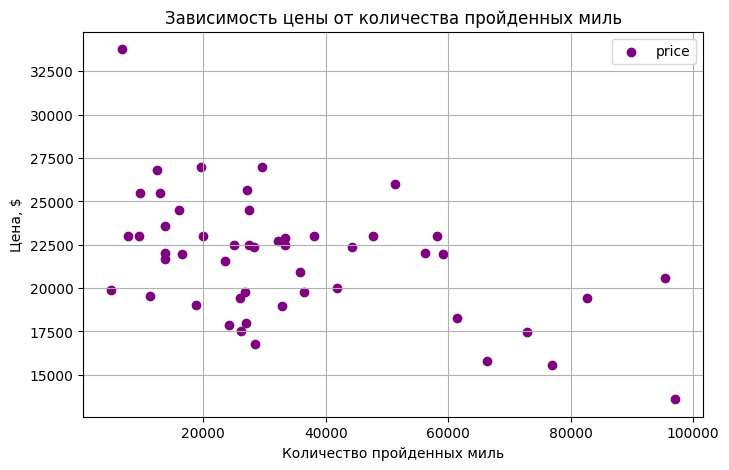

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['miles'], df['price'], color='purple', label='price')
plt.title('Зависимость цены от количества пройденных миль')
plt.xlabel('Количество пройденных миль')
plt.ylabel('Цена, $')
plt.grid(True)
plt.legend()
plt.show()

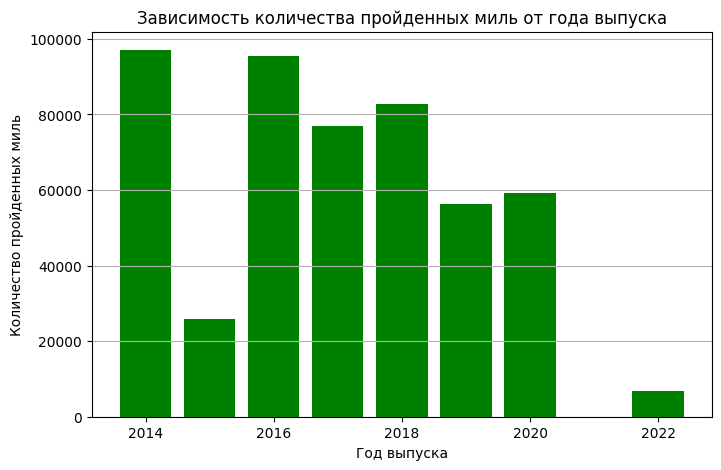

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['year'], df['miles'], color='green')
plt.title('Зависимость количества пройденных миль от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество пройденных миль')
plt.grid(axis='y')
plt.show()

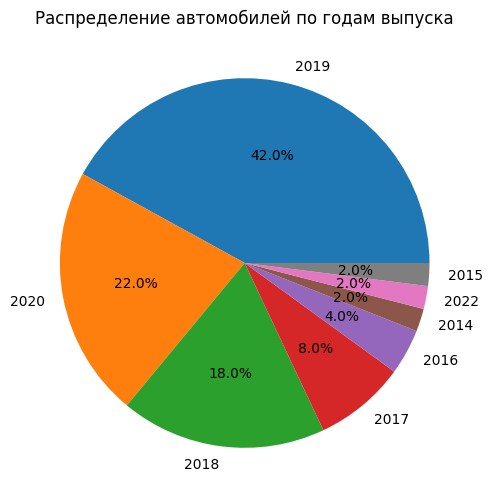

In [ ]:
count_by_year = df['year'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(count_by_year, labels=count_by_year.index, autopct='%1.1f%%')
plt.title('Распределение автомобилей по годам выпуска')
plt.show()

## 2. Диаграммы, библиотека Seaborn

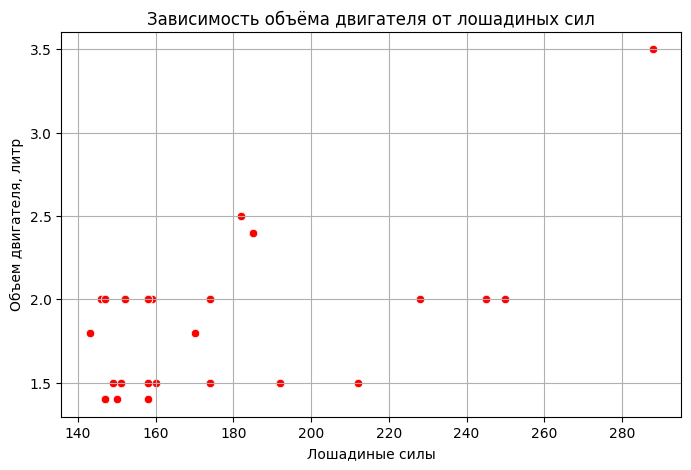

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='engine_capacity_litre', data=df, color='red')
plt.title('Зависимость объёма двигателя от лошадиных сил')
plt.xlabel('Лошадиные силы')
plt.ylabel('Объем двигателя, литр')
plt.grid(True)
plt.show()

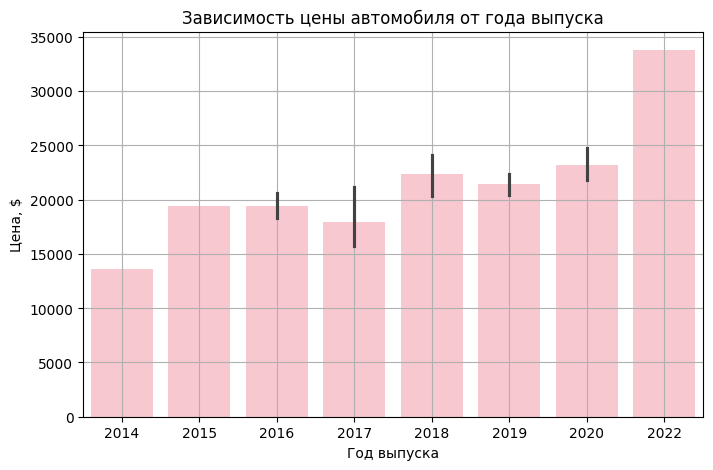

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='year', y='price', data=df, color='pink')
plt.title('Зависимость цены автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Цена, $')
plt.grid(True)
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

Исходя из анализа данных и построенных графиков, можно выделить такие характеристики типичного потребителя:

1. Год выпуска автомобиля: Чаще всего рассматриваются автомобили 2019–2020 годов. Предпочтение отдается более новым автомобилям.
2. Бюджет: Большинство автомобилей в выборке имеют цену от 15000 до 25000 долларов. Это указывает на средний ценовой сегмент.
3. Характеристики: Чаще всего рассматриваются автомобили с объемом двигателя 1.5-2.0 литра и мощностью около 140-200 л.с. Ценится баланс между экономичностью и мощностью.
4. Пробег: Большинство автомобилей имеют пробег до 40,000 миль, что указывает на предпочтение автомобилей с относительно небольшим пробегом.

# Общий вывод по проекту

**Основные этапы работы:**

1. Подбор и анализ данных.
2. Предобработка данных: знакомство с данными, проверка пропусков, поиск дубликатов.
3. Выполнение исследовательского анализа: фильтрация, индексация, сортировка,  группировка.
4. Построение диаграмм для визуализации результатов.
---
**Анализ данных об автомобилях позволяет:**

1. **Улучшить ценообразование:** Полученные данные помогают более точно оценивать стоимость автомобилей в зависимости от их характеристик и состояния.
2. **Оптимизировать маркетинг:** Понимание предпочтений потребителей помогает создавать более эффективные маркетинговые стратегии.
3. **Улучшить процесс покупки:** Информация о зависимости цены от характеристик и состояния автомобиля помогает покупателям делать обоснованные выборы.
